## Laprak UTS EVD 2023 Kelas A

### **Nomor 1**   
Masih ingatkah dengan data instagram yang lalu, Dynamics of Instagram users dataset? Pada bagian ini, akan kita dalami lebih lanjut untuk mendapatkan insight lebih banyak dari para pengguna instagram. Sebagai pengingat, data tersebut diambil dari 464 pengguna instagram, yang terdiri dari enam variabel. Keenam variabel tersebut adalah:  
```
post		: jumlah post
follower	: jumlah follower
following	: jumlah following
like		: jumlah like untuk beberapa postingan terakhir
self 		: tingkat kepercayaan diri pengguna (variabel ordinal 0 – 9)
gender		: jenis kelamin (f: perempuan, m: laki-laki)
```   
Pada tugas sebelumnya, kita telah menyajikan, meringkas, serta melakukan beberapa transformasi dan standardisasi pada data pengguna instagram. Setelah mendapat beberapa insight dan pemahaman sekilas mengenai data, barulah kita beranjak ke tahap berikutnya: uji hipotesis.  
Berdasarkan informasi terkini, diketahui bahwa data pengguna instagram yang kita miliki merupakan data sensus (seluruh populasi) dari Kota X.  Mengacu pada informasi tersebut, lakukanlah hal-hal berikut:
1. Buatlah ringkasan 5 angka, mean, serta standar deviasi dari variabel follower. Sajikan hasilnya ke dalam tabel. Ringkasan parameter tersebutlah yang akan kita gunakan sebagai acuan untuk uji hipotesis ke depannya.    
    Standar deviasi di sini merupakan standar deviasi populasi, sedangkan fungsi sd menghitung standar deviasi sampel. Hitung secara manual, atau gunakan koreksi pada hasil fungsi sd untuk menghitung standar deviasi populasi.
1. Selanjutnya, kita lakukan survei terhadap penduduk Kota X. Kita ambil sampel sebanyak 50 orang secara acak tanpa pengembalian.  Lakukan hal tersebut di R, dengan menggunakan NIF sebagai random seed – set.seed(NIF) – sebelum melakukan pengambilan sampel.
1. Lakukanlah bagian (a) kembali (variabel follower) untuk sampel yang sudah didapatkan di bagian (b). Kira-kira, apakah statistik dari sampel tersebut dapat digunakan sebagai estimasi dari parameter populasi? Jelaskan
1. Menggunakan data sampel, ujilah pernyataan μ = μ0; dengan μ0 adalah mean populasi variabel follower. Jika asumsi tidak terpenuhi, maka anggap terpenuhi dan lanjutkan ke proses berikutnya.
1. Berdasarkan langkah-langkah yang telah dilakukan di atas, hal menarik apa yang dapat anda simpulkan? Elaborasikan dalam satu paragraf singkat.

In [1]:
library(tidyverse)
library(plotly)
library(BSDA)
library(MASS)
library(AID)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


The following object is masked from ‘package:httr’:

    config


Loading required package: lattice


Attaching package: ‘BSDA’


The following object is masked from ‘package:datasets’:

    Orange



Attaching package: ‘MASS’


The following object is masked from ‘package:plotly’:

    select


The following object is masked from ‘package:dplyr’:

    select


Regis

In [2]:
# read data, drop index columns [,-1]
df = read.csv("/kaggle/input/praktikum-evd/tugas1_evd.csv")[,-1]
df1 = df$follower

### 1A. Ringkasan parameter populasi
1. ringkasan lima angka dan mean -> `summary()`
1. standar deviasi populasi -> `sd()` koreksi dengan mengganti pembagi n-1 ke n

In [3]:
# dalam laporan, masukkan nilai-nilainya ke dalam tabel
en = length(df1)
mu0 = mean(df1)

summary(df1)
# koreksi untuk populasi
((en-1)/en)^0.5*sd(df1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   11.0   499.8  1148.0  2029.8  2874.2  7735.0 

[1] 2043.575

### 1B. Pengambilan sampel tanpa pengembalian

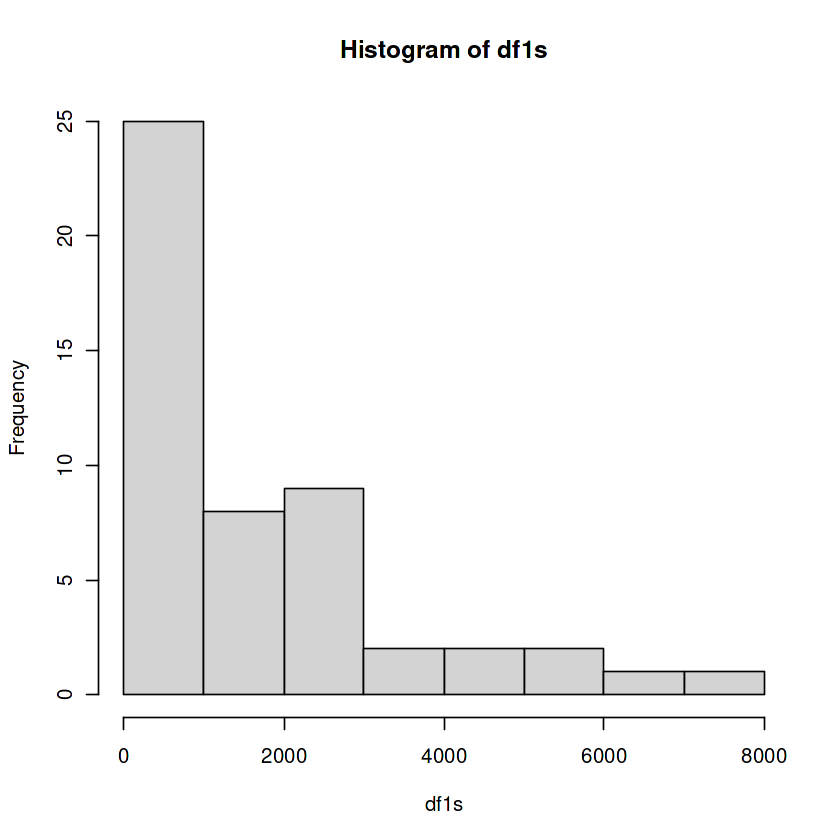

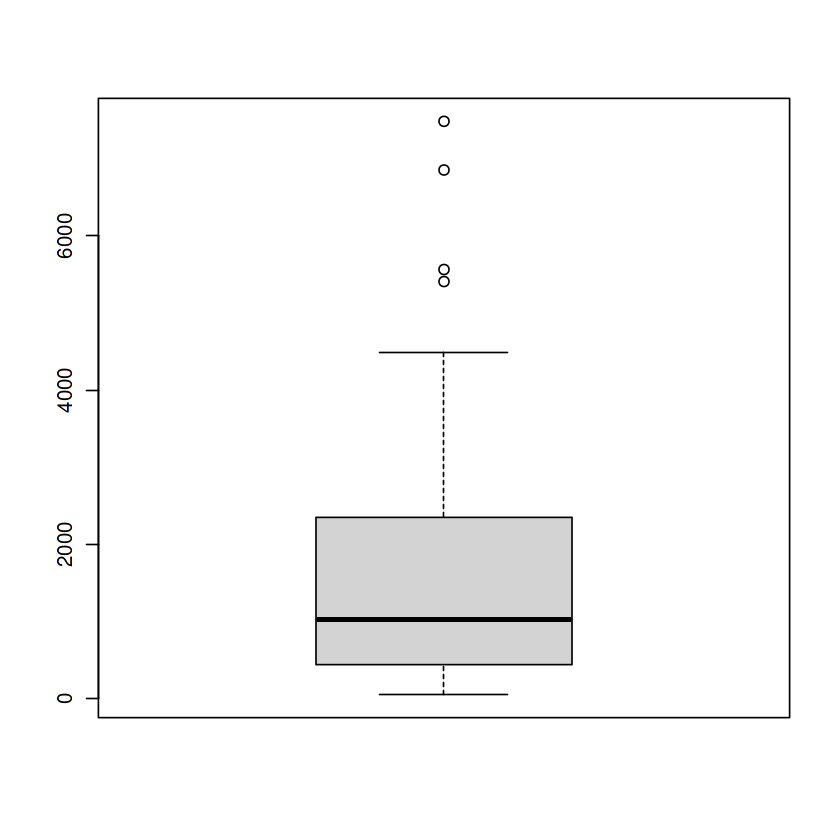

In [4]:
# isi dengan NIF masing-masing
set.seed(20462)
df1s = sample(df1, size=50, replace=F)

# kalau gabut, menjurai atas
hist(df1s); boxplot(df1s)

### 1C. Ringkasan statistik populasi
1. baca bagian 1A
1. untuk seed=20462, kira-kira (subjektif, berdasarkan persentase error)
    1. Q1 dan max dapat mewakili populasi
    1. median, mean, Q3 cukup mewakili populasi
    1. min tidak dapat mewakili populasi

In [5]:
# dalam laporan, masukkan nilai-nilainya ke dalam tabel
en = length(df1s)
mu1s = mean(df1s)

summary(df1s)
# sudah sampel, tak perlu koreksi
sd(df1s)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   53.0   443.2  1028.0  1689.1  2334.5  7486.0 

[1] 1771.86

In [6]:
# persentase error, bandingkan pop vs sampel
# apakah 16% besar? subjektif.
(summary(df1s)-summary(df1))/summary(df1)*100

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
381.818 -11.306 -10.453 -16.787 -18.779  -3.219 

### 1D. Uji hipotesis mu = mu0
1. Uji asumsi normalitas
1. Uji hipotesis (tergantung random-seed)
1. Bisa Z test atau t test (n > 30); keduanya cukup mirip, menghasilkan simpulan sama
    1. Dengan menganggap data memenuhi asumsi normalitas, dapat disimpulkan bahwa mean follower sampel tidak berbeda dengan mu0
    1. (Ekstra) Dengan melakukan transformasi, dapat disimpulkan bahwa mean follower sampel tidak berbeda dengan mu0


### 1E. Elaborasi
Mean dari 10% sampel tanpa pengembalian dari populasi tidak berdistribusi normal tidaklah berbeda secara signifikan dari mean populasi. Itu artinya, dalam kasus ini, mean dari 10% sampel tanpa pengembalian dapat digunakan sebagai estimasi dari mean populasi. Hal ini cukup memudahkan penelitian karena kita perlu melakukan sensus seluruh populasi, cukup mengambil sebagian sampel saja (dalam kasus ini, 10% cukup).

Begitu juga untuk versi "benar"-nya, dengan transformasi sebelum uji hipotesis. Didapatkan kesimpulan yang sama, 10% sampel cukup untuk mengestimasi mean dari populasi. (Lebih baik, malah)


	One Sample t-test

data:  df1s
t = -1.3599, df = 49, p-value = 0.1801
alternative hypothesis: true mean is not equal to 2029.832
95 percent confidence interval:
 1185.523 2192.637
sample estimates:
mean of x 
  1689.08 



	One-sample z-Test

data:  df1s
z = -1.3599, p-value = 0.1739
alternative hypothesis: true mean is not equal to 2029.832
95 percent confidence interval:
 1197.954 2180.206
sample estimates:
mean of x 
  1689.08 



	One Sample t-test

data:  log(df1s)
t = -0.97101, df = 49, p-value = 0.3363
alternative hypothesis: true mean is not equal to 7.04901
95 percent confidence interval:
 6.583249 7.211302
sample estimates:
mean of x 
 6.897275 


[1] 989.5747

[1] 1151.718

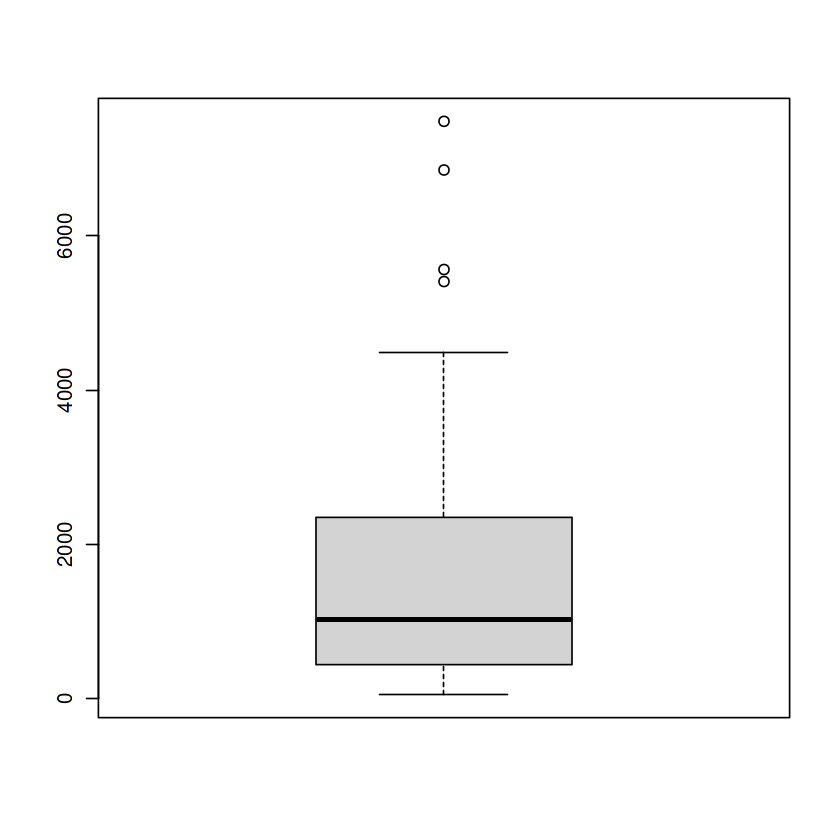

In [7]:
# tidak normal, juraian atas
 boxplot(df1s)

# abaikan normalitas (soal)
t.test(df1s, alternative="two", mu=mu0)
z.test(df1s, alternative="two", mu=mu0, sigma.x=sd(df1s))


# gabut? ekstra
# lakukan trf, log is the most used one tho
t.test(log(df1s), alternative="two", mu=mean(log(df1)))

exp(mean(log(df1s))); exp(mean(log(df1)))

### **Nomor 2**  
Masihkah waras terus menerus berkutat dengan data instagram? Ya, masih menggunakan data yang sama, kali ini, kita tertarik dengan banyaknya klaim pada tugas sebelumnya, bahwa variabel follower berkorelasi secara positif dengan variabel like. Kita akan coba buktikan klaim tersebut menggunakan pendekatan yang berbeda. Kita berfokus pada pengguna yang memiliki banyak follower kurang dari 200 orang sebagai sampel. Berdasarkan sampel tersebut, akan kita buktikan klaim bahwa mean like sampel kurang dari mean like populasi.  (Hint: Gunakan klaim yang ingin dibuktikan sebagai hipotesis alternatif)

1. Pertama-tama, tentu saja mencari parameter populasi dari variabel like. Pada bagian ini, cukup tampilkan nilai mean variabel like.
1. Ambil subset dari data untuk pengguna yang memiliki banyak follower kurang dari 200 orang. Untuk menghindari error, buang observasi dengan like sebanyak nol. Jika langkah yang diambil benar, akan didapat sebanyak 25 observasi.
1. Uji apa yang tepat untuk membuktikan klaim tersebut? Berikan justifikasi.
1. Lakukan uji tersebut dengan tingkat signifikansi 10%. Jika asumsi tidak terpenuhi, lakukan transformasi dengan Tukey’s Ladder! (Selain coba-coba, nilai λ boleh dicari dengan bantuan fungsi box cox di R)
1. Berdasarkan langkah-langkah yang telah dilakukan di atas, hal menarik apa yang dapat anda simpulkan? Elaborasikan dalam satu paragraf singkat.

### 2A. Mean variabel like

In [8]:
mu2 = mean(df$like)

### 2B. Subset variabel like

In [9]:
# salah satu cara
df2 = df[df$follower<200 & df$like > 0,]
head(df2)

,post,follower,following,like,self,gender
,<int>,<int>,<int>,<int>,<int>,<chr>
9,391,175,33,30,9,m
12,5263,153,166,127,9,f
14,536,190,91,56,7,f
19,350,95,43,34,1,m
23,323,193,71,82,9,f
27,117,120,17,13,1,f


### 2C. Pengujian klaim
Uji bisa dilakukan dengan:
1. t.test, jika menggunakan asumsi seperti nomor 1: hanya statistik sampel yang diketahui, sedangkan parameter populasi tidak diketahui seperti real life problem.
2. z.test, jika standar deviasi populasi dianggap diketahui.

dengan H0: mu <= mu0; mu = mean sampel, mu0 = mean populasi

### 2D. Uji Hipotesis
1. asumsi normalitas: menjurai ke atas, transformasi log.   
1. t.test, z.test: didapatkan kesimpulan bahwa mean like sampel kurang dari mean like populasi

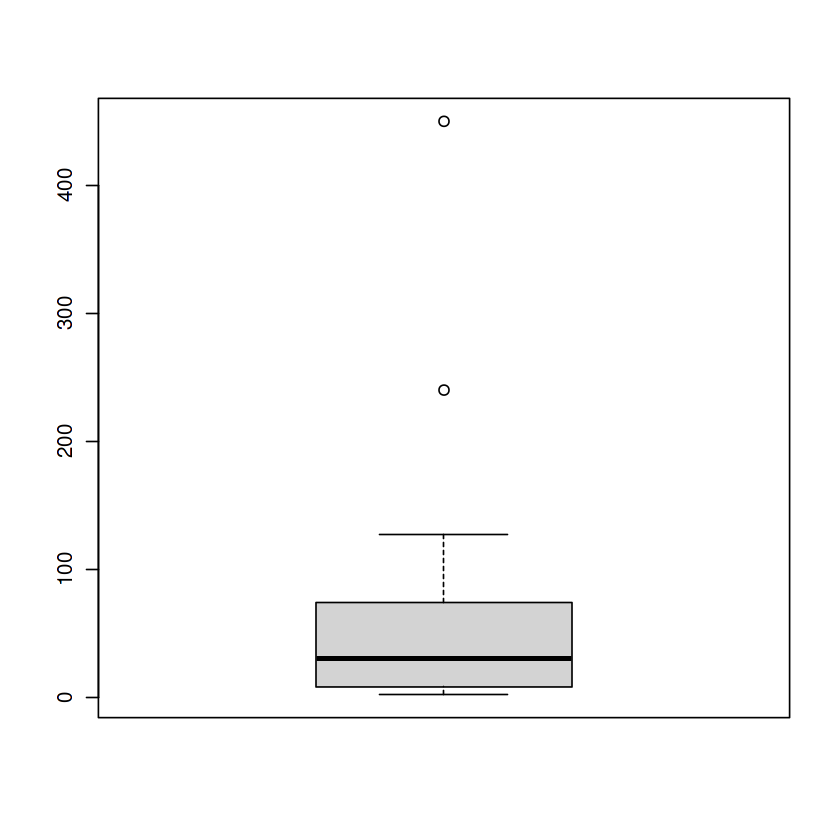

[1] -0.06060606

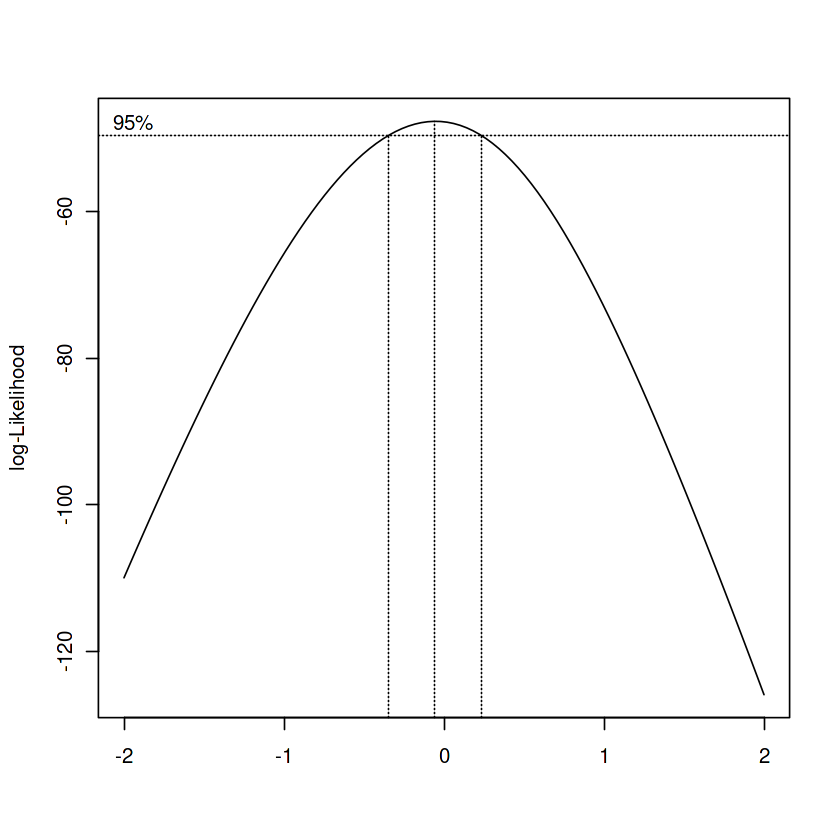


  Box-Cox power transformation 
------------------------------------------------------------------- 

  lambda.hat : -0.05 


  Shapiro-Wilk normality test for transformed data (alpha = 0.05)
------------------------------------------------------------------- 

  statistic  : 0.9743466 
  p.value    : 0.7555338 

  Result     : Transformed data are normal. 
------------------------------------------------------------------- 



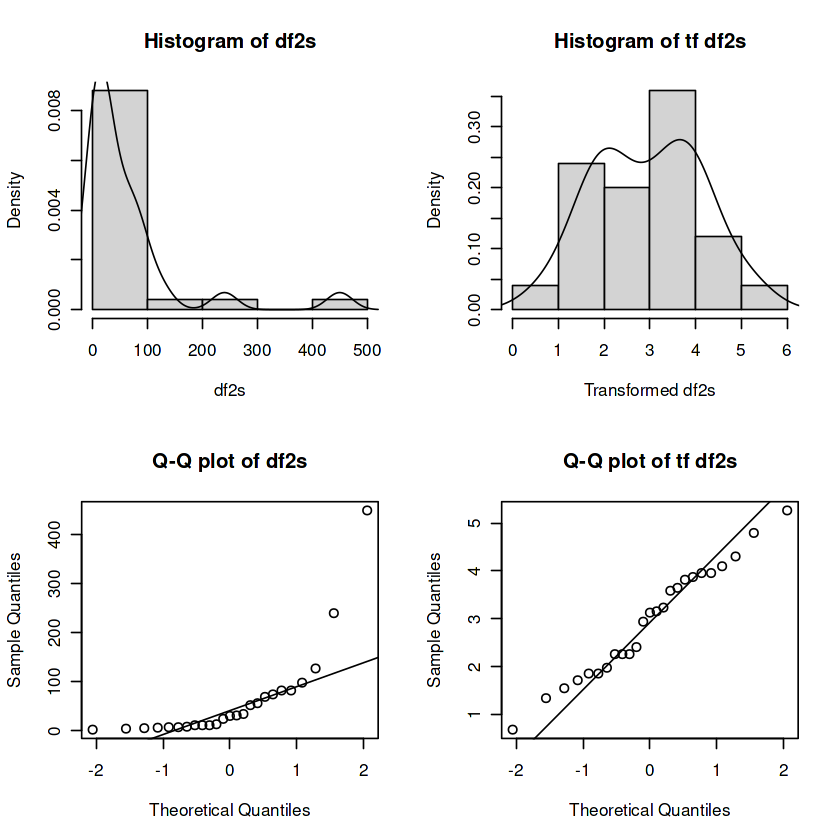

In [10]:
df2s = df2$like

# sedikit menjurai ke atas, 
boxplot(df2s)

# transformasi log
lam = boxcox(df2s~1)
lam$x[which.max(lam$y)]

boxcoxnc(df2s, alpha=0.05, method="mle")

df2t = log(df2s)

In [11]:
sd(log(df$like+1))

[1] 1.278008

In [12]:
# t.test, no install2 library
t.test(df2t, alternative="l", mu=log(mu2))

# benernya mean-log-pop sih :"
# kan sampelnya juga dilog baru dibandingkan meannya
# tapi atas juga bisa dianggep bener, kok. sans.
t.test(df2t, alternative="l", mu=mean(log(df$like+0.0001)))

# z.test, pakai BSDA, +0.0001 digunakan agar tidak NaN 
z.test(df2t, alternative="l", mu=mean(log(df$like+0.0001)), sigma.x=sd(log(df$like+0.0001)))





	One Sample t-test

data:  df2t
t = -5.2713, df = 24, p-value = 1.047e-05
alternative hypothesis: true mean is less than 4.698814
95 percent confidence interval:
     -Inf 3.716112
sample estimates:
mean of x 
 3.243895 



	One Sample t-test

data:  df2t
t = -2.2532, df = 24, p-value = 0.01683
alternative hypothesis: true mean is less than 3.865789
95 percent confidence interval:
     -Inf 3.716112
sample estimates:
mean of x 
 3.243895 



	One-sample z-Test

data:  df2t
z = -2.1335, p-value = 0.01644
alternative hypothesis: true mean is less than 3.865789
95 percent confidence interval:
       NA 3.723343
sample estimates:
mean of x 
 3.243895 


### 2E. Insight
Dengan pendekatan yang berbeda, didapatkan kesimpulan bahwa untuk jumlah follower sedikit (kurang dari 200 orang) memiliki mean like yang lebih rendah diabandingkan mean keseluruhan (populasi). Sehingga, **bisa jadi**, variabel follower berkorelasi secara positif dengan variabel like.